In [1]:
from google.colab import files

uploaded = files.upload()


Saving US_Baby_Names_right.csv to US_Baby_Names_right.csv


krok 1
krok 2
Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object
Liczba rekordów: 1016395
krok 3
   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28
krok 4
       Name  Year Gender State  Count
0      Emma  2004      F    AK     62
1   Madison  2004      F    AK     48
2    Hannah  2004      F    AK     46
3     G

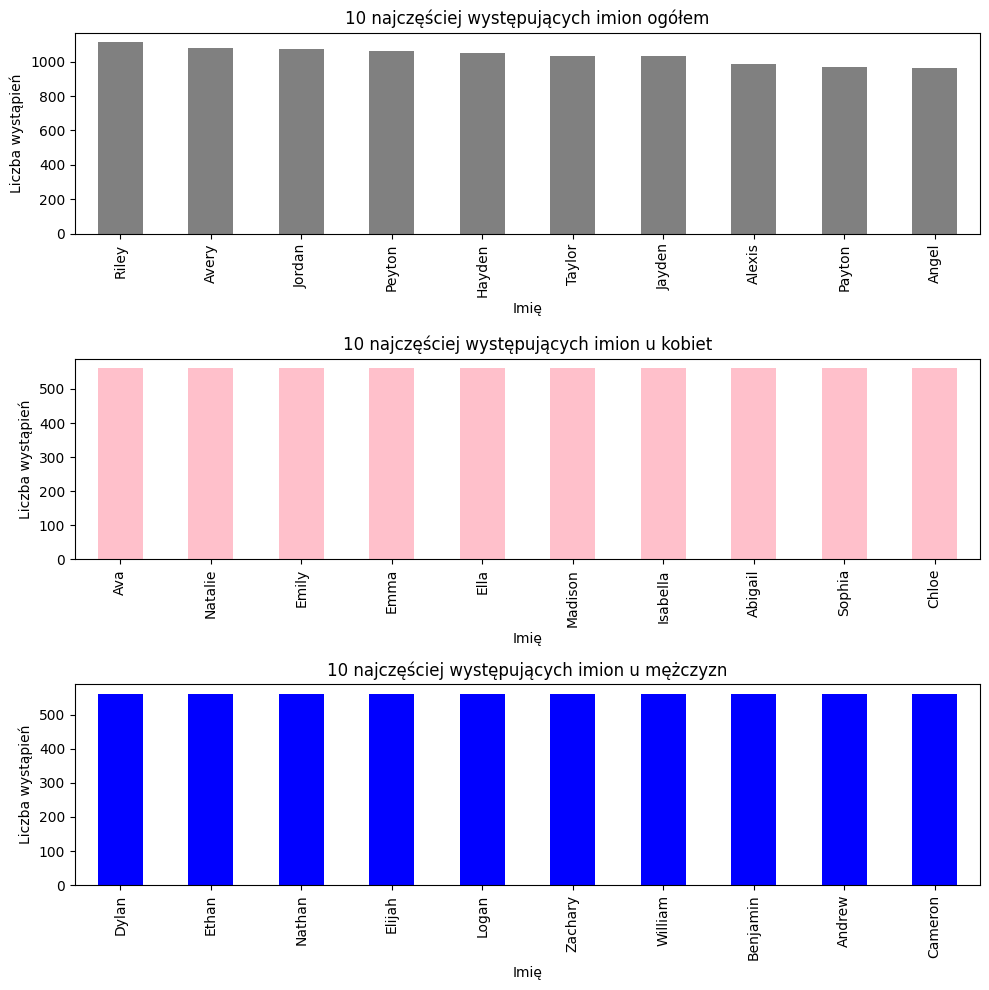

krok 8
17632
krok 9
['Exavier' 'Brodie' 'Brayan' 'Aithan' 'Dayton' 'Esty' 'Rose' 'Kian' 'Maya'
 'Diana']
krok 10
Najczęściej występujące imię: Riley
Średnia występowania imion: 57.644906987295826
Mediana występowania imion: 8.0
Odchylenie standardowe występowania imion: 122.0299635081389


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#krok 1
print("krok 1")
sciezka_do_pliku = '/content/US_Baby_Names_right.csv'
baby_names = pd.read_csv(sciezka_do_pliku)


#krok 2
print("krok 2")
print(baby_names.dtypes)
print("Liczba rekordów:", len(baby_names))


#krok 3
print("krok 3")
print(baby_names.head(10))


#krok 4
print("krok 4")
baby_names = baby_names.drop(['Unnamed: 0', 'Id'], axis=1)
print(baby_names.head(10))


#krok 5
print("krok 5")
l_k = baby_names[baby_names['Gender'] == 'F'].shape[0]
l_m = baby_names[baby_names['Gender'] == 'M'].shape[0]

print("Liczba imion kobiet:", l_k)
print("Liczba imion mezczyzn:", l_m)

if l_k > l_m:
    print("wiecej imion kobiet")
elif l_k < l_m:
    print("wiecej imion mezczyzn")
else:
    print("tyle samo")


#krok 6
print("krok 6")
najczestsze_imiona = baby_names.groupby('Name')['Name'].count().sort_values(ascending=False).head(10)

print("10 najczęściej występujących imion:")
print(najczestsze_imiona)


#krok 7
print("krok 7")
najczestsze_imiona_kobiety = baby_names[baby_names['Gender'] == 'F'].groupby('Name')['Name'].count().sort_values(ascending=False).head(10)
najczestsze_imiona_mezczyzni = baby_names[baby_names['Gender'] == 'M'].groupby('Name')['Name'].count().sort_values(ascending=False).head(10)
najczestsze_imiona_ogolne = baby_names.groupby('Name')['Name'].count().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 10))

#Wykres 1: 10 najczęściej występujących imion ogółem
plt.subplot(3, 1, 1)
najczestsze_imiona_ogolne.plot(kind='bar', color='gray')
plt.title('10 najczęściej występujących imion ogółem')
plt.xlabel('Imię')
plt.ylabel('Liczba wystąpień')

#Wykres 2: 10 najczęściej występujących imion u kobiet
plt.subplot(3, 1, 2)
najczestsze_imiona_kobiety.plot(kind='bar', color='pink')
plt.title('10 najczęściej występujących imion u kobiet')
plt.xlabel('Imię')
plt.ylabel('Liczba wystąpień')

#Wykres 3: 10 najczęściej występujących imion u mężczyzn
plt.subplot(3, 1, 3)
najczestsze_imiona_mezczyzni.plot(kind='bar', color='blue')
plt.title('10 najczęściej występujących imion u mężczyzn')
plt.xlabel('Imię')
plt.ylabel('Liczba wystąpień')

plt.tight_layout()
plt.show()


#krok 8
print("krok 8")
liczba_unikalnych_imion = baby_names['Name'].nunique()
print(liczba_unikalnych_imion)


#krok 9
print("krok 9")
rozkład_prawdopodobieństwa = baby_names['Name'].value_counts(normalize=True)

def generator_imion(liczba_imion):
    return np.random.choice(rozkład_prawdopodobieństwa.index, size=liczba_imion, p=rozkład_prawdopodobieństwa.values)

losowe_imiona = generator_imion(10)

print(losowe_imiona)


#krok 10
print("krok 10")
najczestsze_imie = baby_names['Name'].mode().iloc[0]
print("Najczęściej występujące imię:", najczestsze_imie)

srednia_wystepowania = baby_names['Name'].value_counts().mean()
print("Średnia występowania imion:", srednia_wystepowania)

mediana_wystepowania = baby_names['Name'].value_counts().median()
print("Mediana występowania imion:", mediana_wystepowania)

odchylenie_standardowe_wystepowania = baby_names['Name'].value_counts().std()
print("Odchylenie standardowe występowania imion:", odchylenie_standardowe_wystepowania)